Based on the historical data, a company is trying to decide between developping their Website or their mobile App to make the user experience more enjoyable and profitable.

For this purpose, we can perform a machine learning method called linear regression in order to find the answer.

## Getting to know the Data

In [1]:
# Import of library
import pandas as pd

In [2]:
# Reading the historical data
data = pd.read_csv("data.csv")

In [3]:
# finding out how many rows and columns are in the dataframe
data.shape

(500, 6)

In [4]:
# Looking at the first rows of our dataframe
data.head()

,ID,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1,34.497268,12.655651,39.577668,4.082621,587.951054
1,2,31.926272,11.109461,37.268959,2.664034,392.204933
2,3,33.000915,11.330278,37.110597,4.104543,487.547505
3,4,34.305557,13.717514,36.721283,3.120179,581.852344
4,5,33.330673,12.795189,37.536653,4.446308,599.406092


As we can see data of the company, each row representing a single client with the following information:
* Avg. Session Length: The average session of in-store style advice sessions
* Time on App: The average time that was spent on the App in minutes
* Time on Website: Average time spent on the Website in minutes
* Length of Membership: How many years the client has been a member
* Yearly Amount Spent: The amount spent per year

In [5]:
# Looking at the last lines of our dataframe
data.tail()

,ID,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,496,33.237660,13.566160,36.417985,3.746573,573.847438
496,497,34.702529,11.695736,37.190268,3.576526,529.049004
497,498,32.646777,11.499409,38.332576,4.958264,551.620145
498,499,33.322501,12.391423,36.840086,2.336485,456.469510
499,500,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
# Droping the ID column since it is irrelevant for the anlysis
data.drop('ID', 1,inplace=True)

In [7]:
# Getting an overview of our data
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
# Making sure there is no NaN
data.isnull().values.any()

False

## Exploring the Data

We will take a close look at the time spent on both the App and the Website keeping in mind that: a large amount of spent time on one will hint to more business, meaning a wise choice of development and investement on the platform.   

For the exploratory process we will use Plotly and Cufflinks which will allow us to create interactive plots.

The libraries can be installed by typing into your command line/terminal:


    pip install plotly
    pip install cufflinks


In [24]:
import plotly.plotly as py
import plotly.figure_factory as ff
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
print(__version__)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


2.4.1


In [12]:
# Plotting "Time on App" against "Yearly Amount Spent"
data.iplot(kind='scatter',x='Time on App',y='Yearly Amount Spent',mode='markers',size=10,color="green")

In [13]:
# Plotting "Time on Website" against "Yearly Amount Spent"
data.iplot(kind='scatter',x='Time on Website',y='Yearly Amount Spent',mode='markers',size=10,color="green")

In [14]:
fig = ff.create_scatterplotmatrix(data, height=1000, width=900)
iplot(fig, filename='Scatterplot Matrix')

From the previous plot, we can clearly notice a correlation between the "Yearly Amount Spent" and "Length of Membership".

## Training and Testing the Data

Now, we can move on to linear regression, but first, we should define our dependent variable Y, and then split our data into training and testing to perfom the machine learning. 

In [15]:
# Y variable
Y = data['Yearly Amount Spent']

In [16]:
# X : The remaining features 
X = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [17]:
# Splitting data into training set and testing set using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [18]:
# Training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Testing the model
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

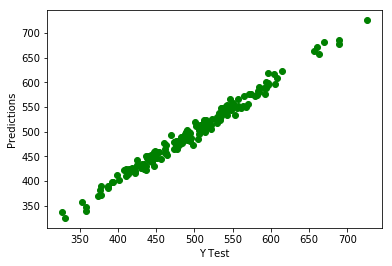

In [20]:
# Ploting Test against Predicted
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,predictions, color="green")
plt.xlabel('Y Test')
plt.ylabel('Predictions')

## Evaluating the Model

The model can be evaluated using sklearn metrics, by calculating the following:

MAE  : Mean Absolute Error 

MSE  : Mean Squared Error

RMSE : Root Mean Squared Error

In [21]:
# Calculating Metrics
import numpy as np
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.3404264542
MSE: 81.5723932569
RMSE: 9.03174364433


## Final Thoughts
We will take a look at the coefficients and see what we can learn from them.

In [22]:
# Calculating Coeffecients
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.491100
Time on App,38.857608
Time on Website,0.385880
Length of Membership,61.773266


If we compare App vs. Website, we can clearly see that the easy way is investing on developping the App. This choice will be more reasonable to bring more success to the company. In the other hand, the Website can use some attention in order to make it more profitable, and ideas from the accumulated App experience can be used to have a strong user experience from the website.